# Machine Learning in Python - Clustering

Clustering algorithms are examples of unsupervised machine learning. You are able to provide data which does not have any labels, and based on the similarities of the data, the algorithm will infer something about the dataset. Clustering algorithms group data together. In this example, we will apply a clustering algorithm to a dataset containing the properties of a type of flower called an Iris. 

Once again, we will import the packages we need for the machine learning process.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('max_rows', 9999)
%matplotlib inline

from sklearn import cluster

The dataset we will be using is from the Seaborn datasets, called Iris. 

In [2]:
df = sns.load_dataset('iris')
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


We can see that there are four columns in the dataset. For the sake of explanation, we will be looking at the **petal_length** and the **petal_width** columns for now. We will therefore remove the **sepal_length** and **sepal_width** columns.

In [3]:
df = df.drop(['sepal_length', 'sepal_width'], axis = 1)

We now want to visualise the data. Let us plot a scatter plot to see the relationship between the petal length and width.

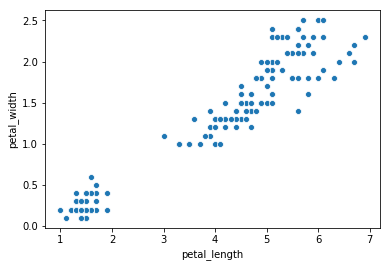

In [4]:
sns.scatterplot(x = 'petal_length', y = 'petal_width', data = df)

We can see that there is a relationship; as the petal length increases, so too does the width. Let us now add the **species** as the **hue** argument.

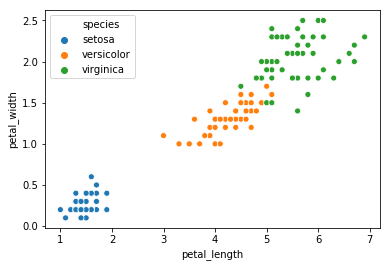

In [5]:
sns.scatterplot(x = 'petal_length', y = 'petal_width', data = df, hue = 'species')

We can see a definite set of clusters. Would we be bale to use a machine learning algorithm to determine these clusters? As this is an unsupervised machine learning problem, let us define out training set to be only the **petal_length** and the **petal-width** columns.

In [6]:
x = df[['petal_length', 'petal_width']]

Now we can define the machine learning model. 

In [7]:
model = cluster.KMeans(n_clusters=3, random_state=1)

In [8]:
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

The machine learning model has now determined some cluster centers, as was explained in the lecture slides. Let's have a look at them.

In [9]:
centers = model.cluster_centers_
centers

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

We will save the result of the centers into a dataframe.

In [10]:
centers = pd.DataFrame.from_records(centers, columns=['petal_length', 'petal_width'])

As we have have chosen 3 clusters, and our dataset has 2 feaures, the **cluster_centers_** command returns a result of a 3x2 matrix. Let us visualise what this looks like.

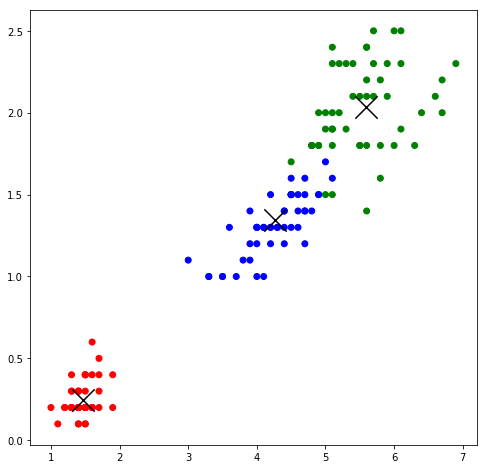

In [11]:
plt.figure(figsize=(8, 8))

colors = {'setosa':'red', 'versicolor':'blue', 'virginica':"green"}
plt.scatter(x = 'petal_length', y = 'petal_width', data = df, c = df['species'].apply(lambda x: colors[x]))
plt.scatter(x = 'petal_length', y = 'petal_width', data = centers, marker = 'x', s = 500, c = 'black')

This graph gives you a good idea of what the clustering algorithm is doing. However, the dataset we were working with contains more than two dimensions. This is more difficult to visualise. However, the clustering algorithm works in the same way. Let us re-import the dataset, and re-run the clustering algorithm on the entire dataset.

In [12]:
df = sns.load_dataset('iris')

Let is run a pairplot on the dataset.

C:\Users\julesd\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


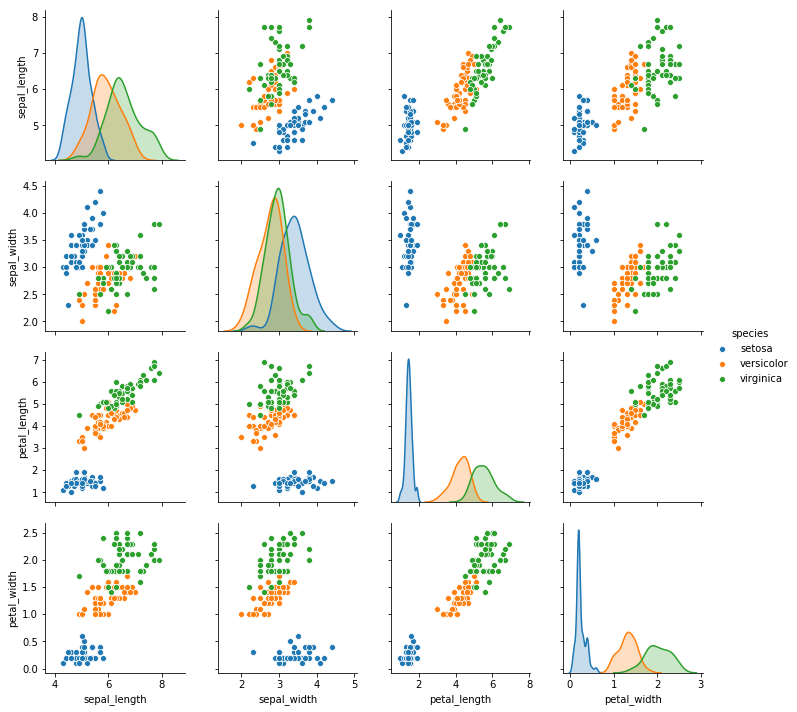

In [13]:
sns.pairplot(df, hue = 'species')

We can now create the model and fit our data to it.

In [14]:
model = cluster.KMeans(n_clusters=3, random_state=1)

We will now remove the **species** column from the set.

In [15]:
labels = df['species']

In [16]:
df.drop('species', axis = 1, inplace=True)
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [17]:
model.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [18]:
centers = model.cluster_centers_
centers

array([[6.24722222, 2.84722222, 4.775     , 1.575     ],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.53214286, 2.63571429, 3.96071429, 1.22857143],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ]])

We can run the **.predict()** function on the set. We can recombine the dataset with the labels, and see how well the clustering algorithm did.

In [19]:
pred = model.predict(df)
df['clusters'] = pred
df['species'] = labels
df

,sepal_length,sepal_width,petal_length,petal_width,clusters,species
0,5.1,3.5,1.4,0.2,1,setosa
1,4.9,3.0,1.4,0.2,1,setosa
2,4.7,3.2,1.3,0.2,1,setosa
3,4.6,3.1,1.5,0.2,1,setosa
4,5.0,3.6,1.4,0.2,1,setosa
5,5.4,3.9,1.7,0.4,1,setosa
6,4.6,3.4,1.4,0.3,1,setosa
7,5.0,3.4,1.5,0.2,1,setosa
8,4.4,2.9,1.4,0.2,1,setosa
9,4.9,3.1,1.5,0.1,1,setosa


In [20]:
centers = model.cluster_centers_
centers = pd.DataFrame.from_records(centers, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
centers

,sepal_length,sepal_width,petal_length,petal_width
0,6.247222,2.847222,4.775000,1.575000
1,5.006000,3.428000,1.462000,0.246000
2,5.532143,2.635714,3.960714,1.228571
3,7.475000,3.125000,6.300000,2.050000
4,6.529167,3.058333,5.508333,2.162500


In [21]:
df.groupby('clusters').mean()

,sepal_length,sepal_width,petal_length,petal_width
clusters,,,,
0,6.247222,2.847222,4.775000,1.575000
1,5.006000,3.428000,1.462000,0.246000
2,5.532143,2.635714,3.960714,1.228571
3,7.475000,3.125000,6.300000,2.050000
4,6.529167,3.058333,5.508333,2.162500


In [22]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width,clusters
species,,,,,
setosa,5.006,3.428,1.462,0.246,1.00
versicolor,5.936,2.770,4.260,1.326,1.08
virginica,6.588,2.974,5.552,2.026,2.68


We can see that the **setosa** iris is very unique, but there seems to be a fair bit of similarity between **virginica** and **versicolor**. However, let us plot the **petal_length** and **petal_width**, and we can apply the hue argument as the species or the predicted cluster.?

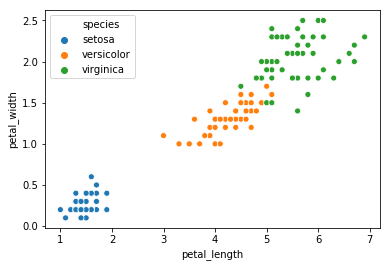

In [23]:
sns.scatterplot(x = 'petal_length', y = 'petal_width', data = df, hue = 'species')

In [24]:
df

,sepal_length,sepal_width,petal_length,petal_width,clusters,species
0,5.1,3.5,1.4,0.2,1,setosa
1,4.9,3.0,1.4,0.2,1,setosa
2,4.7,3.2,1.3,0.2,1,setosa
3,4.6,3.1,1.5,0.2,1,setosa
4,5.0,3.6,1.4,0.2,1,setosa
5,5.4,3.9,1.7,0.4,1,setosa
6,4.6,3.4,1.4,0.3,1,setosa
7,5.0,3.4,1.5,0.2,1,setosa
8,4.4,2.9,1.4,0.2,1,setosa
9,4.9,3.1,1.5,0.1,1,setosa


Text(0.5,1,'K_Means')

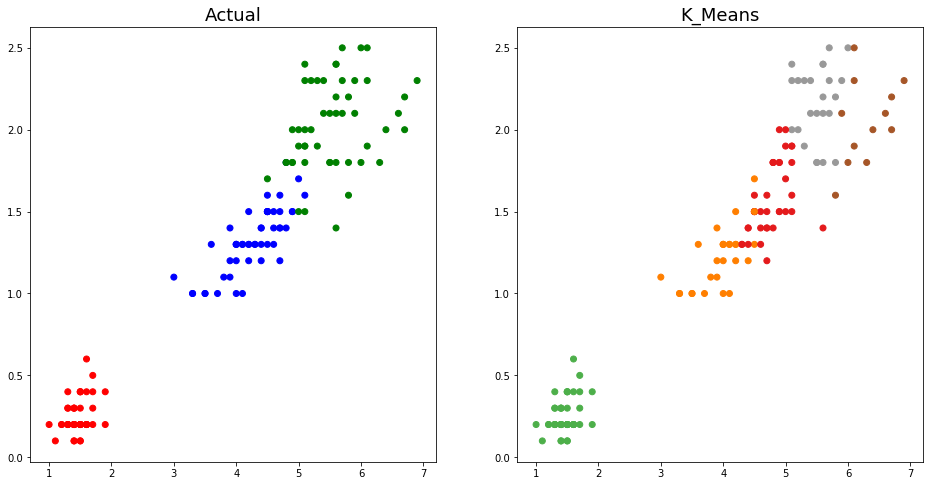

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))

colors = {'setosa':'red', 'versicolor':'blue', 'virginica':"green"}
axes[0].scatter(df['petal_length'], df['petal_width'], c=df['species'].apply(lambda x: colors[x]))
axes[1].scatter(df['petal_length'], df['petal_width'], c=df['clusters'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)

## Choosing the number of centers

In the previous exmaple, we had a good idea of how many centers our dataset had. What if this is not the case? How do we go about choosing the number of centers?

Let us start by re-importing the Iris datset.

In [418]:
df = sns.load_dataset('iris')

### The elbow method

The next block of code contains a for-loop. The range over which we will be iterating will be the number of clusters we expect in the dataset. For each number of clusters centers we choose, we will:
1. Run the clustering algorithm. 
2. Append the predicted labels to the dataset.
3. Run a nested for-loop which will compute the distances of each point in the dataset to the associated cluster center.
4. Square these distances, and then take the sum of all of the squared distances.
5. Append these sum of squared distances to a list.
6. Plot the list

C:\Users\julesd\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2448: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
C:\Users\julesd\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2448: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


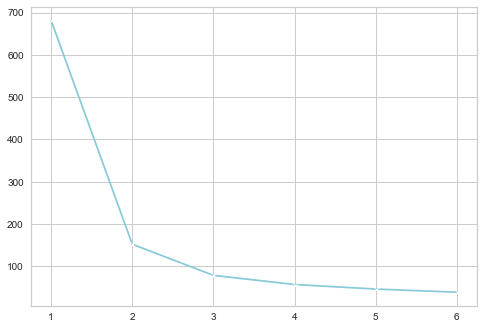

In [433]:
elbow_score = []

for count in range(1, 7):  
    
    model = cluster.KMeans(n_clusters=count, random_state=1) #-----------------1
    x = df.drop('species', axis = 1)
    model.fit(x)

    clusters = model.predict(x)
    columns = x.columns
    centers = model.cluster_centers_
    x['clusters'] = clusters #-------------------------------------------------2                      

    temp_df = pd.DataFrame(columns = columns)
    
    #-------------------------------------------------------------------------3
    for i in range(0, centers.shape[0]):
        distances = x[x['clusters'] == i].drop('clusters', axis = 1).sub(centers[i])
        temp_df = pd.concat([distances, temp_df])
        
    #-------------------------------------------------------------------------4
    distances = temp_df.sort_index()
    distances = distances ** 2
    distances['clusters'] = clusters
    squared_dist = distances.drop('clusters', axis = 1).sum().sum()
    
    
    elbow_score.append(squared_dist)

    
sns.lineplot(x = [*range(1, 7)], y = elbow_score, marker = 'x', c = 'c') #---6

We can then read off this list to see where the inflection point lies. In this case, there seems to be one at around 2 or 3, which indicates that our choice of 3 clusters was correct. The elbow method serves as an indication and is not precise. There are a numer of other methods one could use, including:
1. X-means clustering
2. Information Criterion Approach
3. The Silhouette Method
The following Wikipedia aticle is a good place to start:
https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set#Information_criterion_approach

If you do not want to write the code to determine the elbow curve yourself, you can import a package that can do this for you. This package shows the same results as we obtained in our for-loop, but this also plots the time taken for each iteration. As an exercise on your own, see if you can modify the above for-loop and see if you can plot the time taken for each iteration.

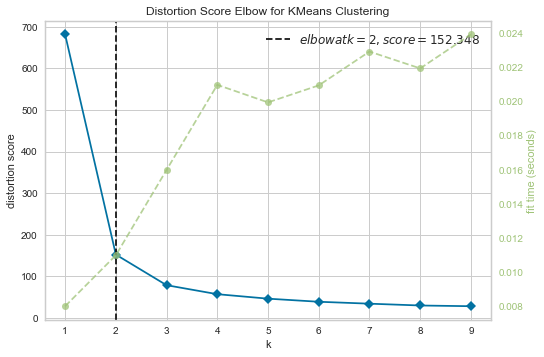

In [442]:
from yellowbrick.cluster import KElbowVisualizer
x = df.drop('species', axis = 1)
model = cluster.KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure